# Mask Maker

## An attempt to try to make a mask that'll tell us where lakes and land are.

### This'll be... fun.

So, we have several masks of Titan that have been taken vrom various VIMS flybys. The problem is these masks don't line up and there's a lot of potential errors in where everything is. So, we're going to carefully try to stitch it all toegther to find out which areas are definitely land, which are definitely sea, and which are "no go" zones near the shoreline. To do that, we need to be able to read the images.

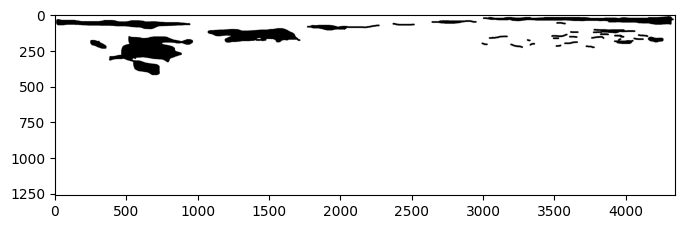

In [41]:
# READ IN FILES

#IMPORTS 
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

# READ IN METADATA FILE
metadata = [[0 for x in range(8)] for x in range(11)] 
#There are 11 flybys and 8 values we keep track of for each one.
#Flyby Num, Up, Down, Left, Right, X Pixel Dimension, Y Pixel Dimension, Resolution
#Up/down/left/right refers to the direction the value was measured from. In theory
#these are related to latlon extremes. In practice they are something else and
#will have to be converted. 

with open('DimensionsLatLon.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i,j = 0,0
    for row in csv_reader:
        if (i == 0):
            i=i+1
        else: 
            j=0
            while (j < 8):
                metadata[i-1][j] = int(row[j])
                j=j+1
            i=i+1

#Now we need to read in the images so we can manipulate them.
im1 = Image.open("T67.Egress.lanczos.seqreplace.cyl.Jcube69.tif")
ima1 = np.array(im1)
im2 = Image.open("T76.Egress.lanczos.seqreplace.cyl.Jcube69.tif")
ima2 = np.array(im2)
im3 = Image.open("T93.Ingress.lanczos.seqreplace.cyl.Jcube69.tif")
ima3 = np.array(im3)
im4 = Image.open("T94.Ingress.lanczos.seqreplace.cyl.Jcube69.tif")
ima4 = np.array(im4)
im5 = Image.open("T96.Ingress.lanczos.seqreplace.cyl.Jcube69.tif")
ima5 = np.array(im5)
im6 = Image.open("T97.Ingress.lanczos.seqreplace.cyl.Jcube69.2.tif")
ima6 = np.array(im6)
im7 = Image.open("T98.Ingress.lanczos.seqreplace.cyl.Jcube69.tif")
ima7 = np.array(im7)
im8 = Image.open("T100.Ingress.lanczos.seqreplace.cyl.Jcube69.tif")
ima8 = np.array(im8)
im9 = Image.open("T104.Egress.nn.seqreplace.cyl.Jcube69.tif")
ima9 = np.array(im9)
im10 = Image.open("T121.Egress.lanczos.seqreplace.cyl.Jcube69.tif")
ima10 = np.array(im10)
im11 = Image.open("T126.egress.replace.cyl.Jcube69.tif")
ima11 = np.array(im11)

allImages = [ima1, ima2, ima3, ima4, ima5, ima6, ima7, ima8, ima9, ima10, ima11]

fig, ax = plt.subplots(figsize = (8,8))
image = ax.imshow(ima3)
#Tifs are stored by y, x, and then RGB. RGB is mostly irrelevant to us though, as this is monochrome. 

We now have everything stored in the "allImages" array. Problem is that everything is at its own resolution, we need to be able to compare them to each other. The highest resolution we are using is 12, that is, every lat-lon pixel is divided into 12. Flybys 67 76 and 93 have these resolutions, so they don't need to be changed. The rest, however, definitely do. Unfortunately it's not just as simple as duplicating pixels by an exact scale, as we have an odd number of pixels in each set. Usually we range from -180 to 180, but that includes a 0 pixel, so the divisions get a little messy. We don't want to interpolate as our values are only 0 and 1, we want to find the nearest neighbor. 

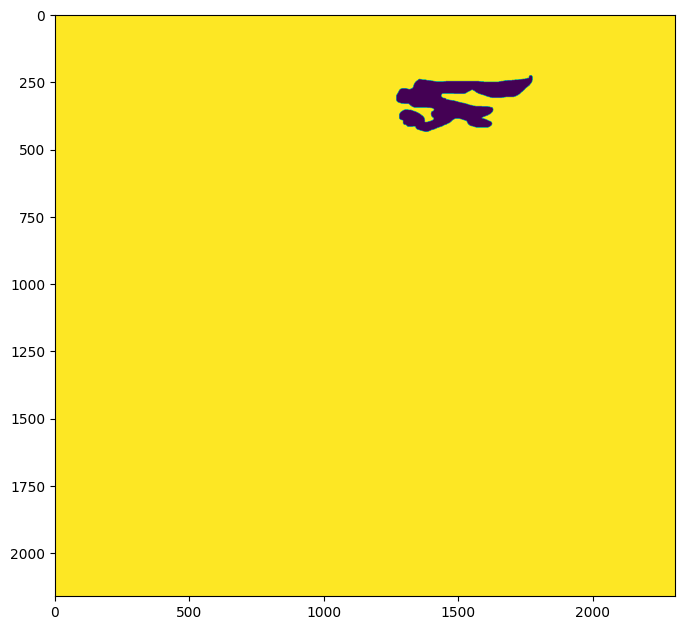

In [55]:
# UPSCALE THE IMAGES
#basically replace the old images with their new ones.
#The hope is that I can make use of the pointers being a reference instead of fighting against it this time.

#Have to make the new grids outside the loop so they aren't overridden or lost.
#(There is more defintiely a better way to do this, I just don't know what it is).
#The first three are the right size but we want to convert them to true monocrhome arrays.
grid1 = [[0 for x in range(int(((metadata[0][5]-1)/(metadata[0][7]))*12)+1)] 
         for x in range(int((((metadata[0][6]-1)/(metadata[0][7]))*12)+1))] 
grid2 = [[0 for x in range(int(((metadata[1][5]-1)/(metadata[1][7]))*12)+1)] 
         for x in range(int((((metadata[1][6]-1)/(metadata[1][7]))*12)+1))] 
grid3 = [[0 for x in range(int(((metadata[2][5]-1)/(metadata[2][7]))*12)+1)] 
         for x in range(int((((metadata[2][6]-1)/(metadata[2][7]))*12)+1))] 
grid4 = [[0 for x in range(int(((metadata[3][5]-1)/(metadata[3][7]))*12)+1)] 
         for x in range(int((((metadata[3][6]-1)/(metadata[3][7]))*12)+1))] 
grid5 = [[0 for x in range(int(((metadata[4][5]-1)/(metadata[4][7]))*12)+1)] 
         for x in range(int((((metadata[4][6]-1)/(metadata[4][7]))*12)+1))] 
grid6 = [[0 for x in range(int(((metadata[5][5]-1)/(metadata[5][7]))*12)+1)] 
         for x in range(int((((metadata[5][6]-1)/(metadata[5][7]))*12)+1))] 
grid7 = [[0 for x in range(int(((metadata[6][5]-1)/(metadata[6][7]))*12)+1)] 
         for x in range(int((((metadata[6][6]-1)/(metadata[6][7]))*12)+1))] 
grid8 = [[0 for x in range(int(((metadata[7][5]-1)/(metadata[7][7]))*12)+1)] 
         for x in range(int((((metadata[7][6]-1)/(metadata[7][7]))*12)+1))] 
grid9 = [[0 for x in range(int(((metadata[8][5]-1)/(metadata[8][7]))*12)+1)] 
         for x in range(int((((metadata[8][6]-1)/(metadata[8][7]))*12)+1))] 
grid10 = [[0 for x in range(int(((metadata[9][5]-1)/(metadata[9][7]))*12)+1)] 
         for x in range(int((((metadata[9][6]-1)/(metadata[9][7]))*12)+1))] 
grid11 = [[0 for x in range(int(((metadata[10][5]-1)/(metadata[10][7]))*12)+1)] 
         for x in range(int((((metadata[10][6]-1)/(metadata[10][7]))*12)+1))] 

allGrids = [grid1,grid2,grid3,grid4,grid5,grid6,grid7,grid8,grid9,grid10,grid11]

i = 0
for image in allImages:
    if (metadata[i][7] == 12):
        #No need to fill in pixels, but the grid must be set.
        x,y = 0,0
        while (x < metadata[i][5]):
            y=0
            while (y < metadata[i][6]):
                allGrids[i][y][x] = allImages[i][y][x][0]/255 #Removing RGB, setting it to the R value on a 0 or 1 scale.
                y=y+1
            x=x+1
        i=i+1 

    else:
        #Rest of these are going to need some nearest neighbor nonsense.
        #Can't just iterate them one-to-one like we want to. 
        
        i=i+1

fig, ax = plt.subplots(figsize = (8,8))
image = ax.imshow(allGrids[0])

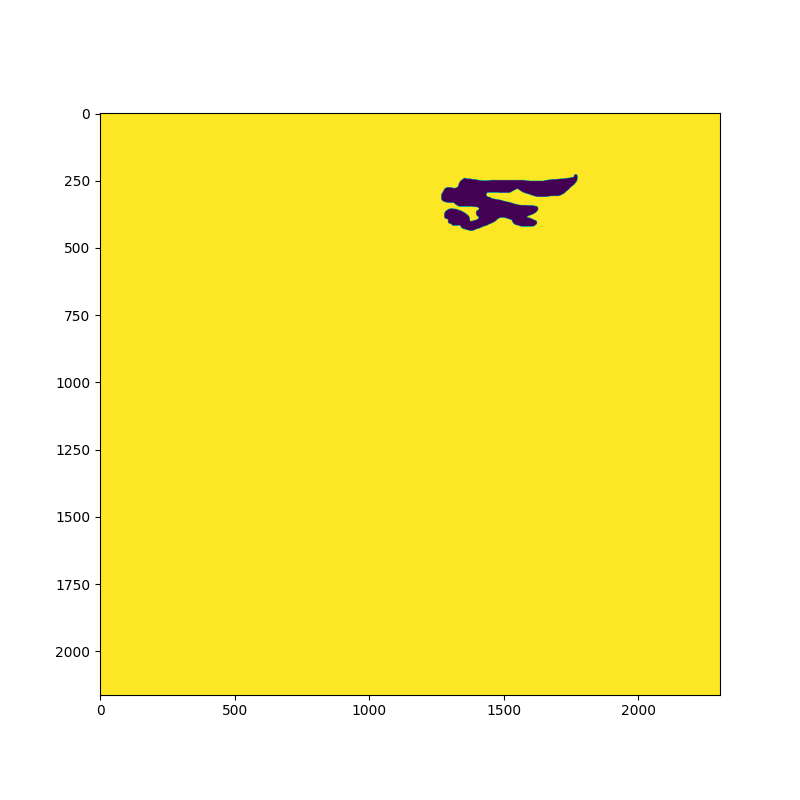

In [56]:
%matplotlib ipympl

fig, ax = plt.subplots(figsize = (8,8))
image = ax.imshow(allGrids[0])